In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
data = pd.read_csv('hdfc.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 1:2].values
testing_set=data.iloc[930:,1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover(Lacs)
0,01-01-1996,2703.6,2670.00,2640.0,NaN,2669.20,500,1.332000e+11
1,02-01-1996,2669.2,2710.00,2650.0,NaN,2706.20,1470,3.956890e+11
2,03-01-1996,2706.2,2690.00,2666.0,NaN,2679.00,410,1.097410e+11
3,04-01-1996,2679.0,2709.55,2653.0,NaN,2704.50,2600,6.989070e+11
4,05-01-1996,2704.5,2709.00,2665.0,NaN,2701.15,1990,5.368660e+11


In [3]:
#data.drop('Last', axis=1, inplace=True)
#data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover(Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('reliance_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open     High     Low  Last    Close  Total Trade Quantity
0  01-01-1996  2703.6  2670.00  2640.0   NaN  2669.20                   500
1  02-01-1996  2669.2  2710.00  2650.0   NaN  2706.20                  1470
2  03-01-1996  2706.2  2690.00  2666.0   NaN  2679.00                   410
3  04-01-1996  2679.0  2709.55  2653.0   NaN  2704.50                  2600
4  05-01-1996  2704.5  2709.00  2665.0   NaN  2701.15                  1990


In [4]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

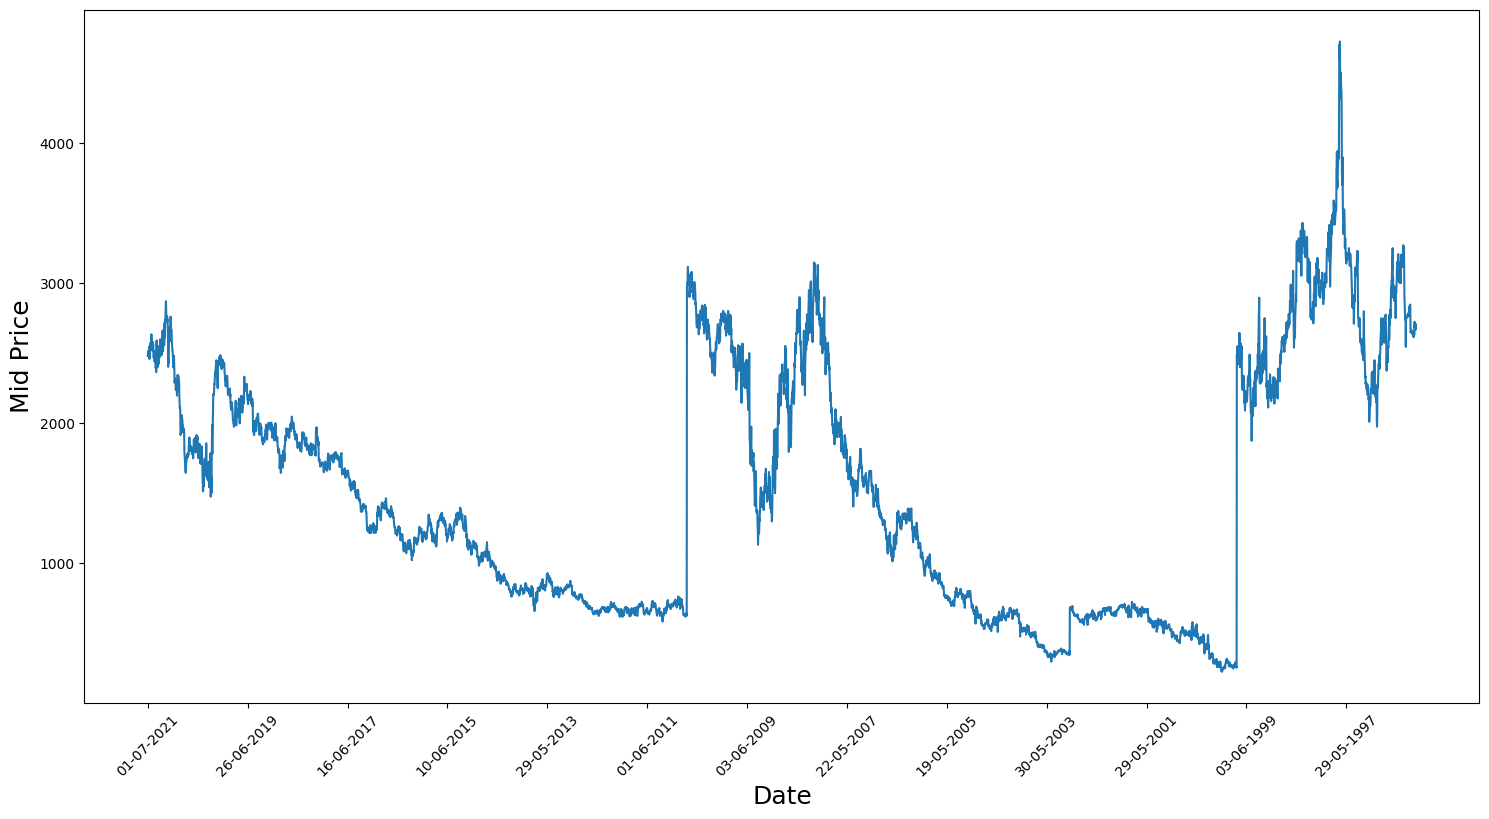

In [5]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
15/15 [==============================] - 7s 34ms/step - loss: 0.1252
Epoch 2/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0204
Epoch 3/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0124
Epoch 4/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0101
Epoch 5/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0080
Epoch 6/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0071
Epoch 7/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0060
Epoch 8/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0053
Epoch 9/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0057
Epoch 10/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0056
Epoch 11/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0053
Epoch 12/50
15/15 [==============================] - 0s 32ms/step - loss: 0.0050
Epoch 13/50
15/15 [==================

In [10]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 2s 6ms/step


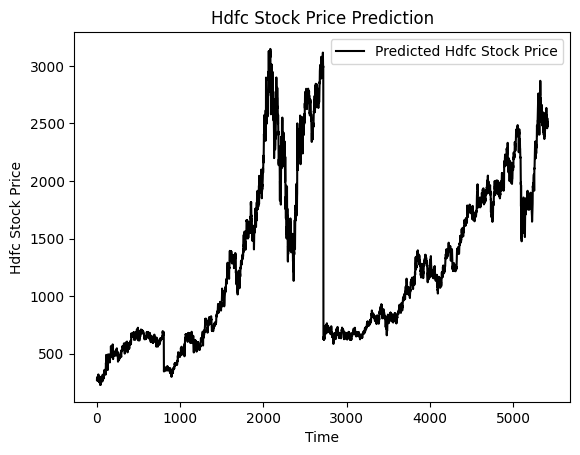

In [14]:
plt.plot(real_stock_price, color = 'black', label = 'Predicted Hdfc Stock Price')
plt.title('Hdfc Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Hdfc Stock Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, f1_score

# Convert real_stock_price to binary values (1 if the price increases, 0 otherwise)
real_price_diff = np.diff(real_stock_price, axis=0)
real_direction = np.where(real_price_diff > 0, 1, 0)

# Convert predicted_stock_price to binary values (1 if the price increases, 0 otherwise)
predicted_price_diff = np.diff(predicted_stock_price, axis=0)
predicted_direction = np.where(predicted_price_diff > 0, 1, 0)

# Ensure the lengths of real_direction and predicted_direction are the same
real_direction = real_direction[-len(predicted_direction):]

# Calculate accuracy
accuracy = accuracy_score(real_direction, predicted_direction)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(real_direction, predicted_direction)
print("F1 Score:", f1)



Accuracy: 0.48639455782312924
F1 Score: 0.5206349206349207
